In [1]:
import pandas as pd

movies_path = "../data/raw/netflix_movies_detailed_up_to_2025.csv"
tv_path = "../data/raw/netflix_tv_shows_detailed_up_to_2025.csv"

movies_df = pd.read_csv(movies_path)
tv_df = pd.read_csv(tv_path)

In [12]:
# Import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Select numerical columns for EDA (movies)
movie_numeric_cols = [
    "release_year",
    "popularity",
    "vote_average",
    "vote_count",
    "budget",
    "revenue"
]

# Summary statistics for movies
movies_df[movie_numeric_cols].describe()

,release_year,popularity,vote_average,vote_count,budget,revenue
count,16000.000000,16000.000000,16000.000000,16000.000000,1.600000e+04,1.600000e+04
mean,2017.500000,20.384728,5.956368,718.656125,8.766792e+06,2.446308e+07
std,4.609916,68.610033,1.754741,2080.198316,2.912450e+07,1.116977e+08
min,2010.000000,3.860000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2013.750000,7.840750,5.600000,53.000000,0.000000e+00,0.000000e+00
50%,2017.500000,10.913500,6.300000,138.000000,0.000000e+00,0.000000e+00
75%,2021.250000,17.336500,6.923000,422.000000,2.200000e+06,1.654473e+06
max,2025.000000,3876.006000,10.000000,37119.000000,4.600000e+08,2.799439e+09


In [5]:
# Select numerical columns for EDA (TV shows)
tv_numeric_cols = [
    "release_year",
    "popularity",
    "vote_average",
    "vote_count"
]

# Summary statistics for TV shows
tv_df[tv_numeric_cols].describe()

,release_year,popularity,vote_average,vote_count
count,16000.000000,16000.000000,16000.000000,16000.000000
mean,2017.500000,64.850984,5.417107,107.014313
std,4.609916,139.387289,3.266492,607.461581
min,2010.000000,2.323000,0.000000,0.000000
25%,2013.750000,24.874750,2.700000,1.000000
50%,2017.500000,36.187500,6.800000,4.000000
75%,2021.250000,62.187500,7.800000,30.000000
max,2025.000000,6421.923000,10.000000,24664.000000


Based on the summary statistics, it is expected that popularity, budget, and revenue in movies, as well as popularity and vote_count in TV shows, are right-skewed. This is indicated by the presence of extreme maximum values and large gaps between the mean and median.

In particular, the maximum popularity value for TV shows (6421) is notably higher than that of movies (3876), suggesting a stronger right skew driven by a small number of extremely popular titles.

### Univariate Visualization

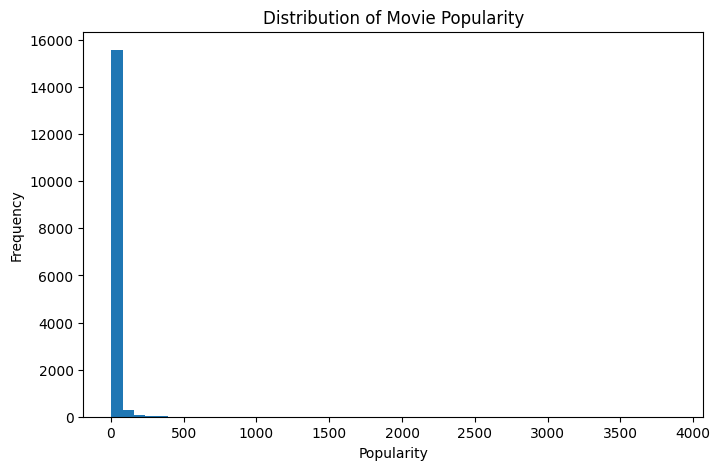

In [8]:
# Plot histogram for movie popularity
plt.figure(figsize=(8, 5))
plt.hist(movies_df["popularity"], bins=50)
plt.title("Distribution of Movie Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

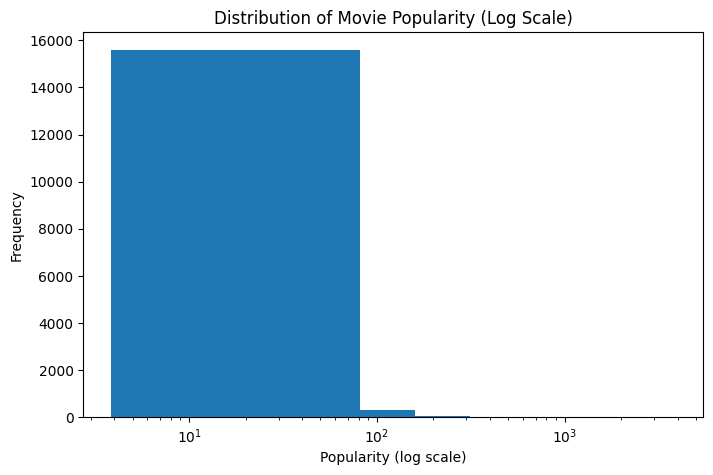

In [10]:
# Histogram with log-scaled x-axis
plt.figure(figsize=(8, 5))
plt.hist(movies_df["popularity"], bins=50)
plt.xscale("log")
plt.title("Distribution of Movie Popularity (Log Scale)")
plt.xlabel("Popularity (log scale)")
plt.ylabel("Frequency")
plt.show()

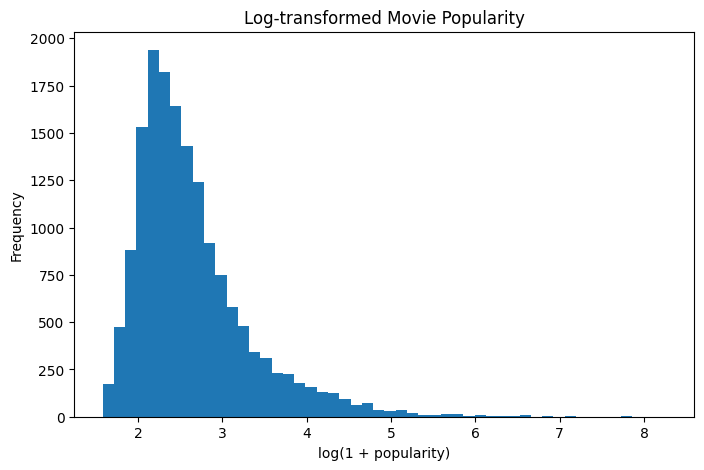

In [13]:
# Histogram after log transformation
plt.figure(figsize=(8, 5))
plt.hist(np.log1p(movies_df["popularity"]), bins=50)
plt.title("Log-transformed Movie Popularity")
plt.xlabel("log(1 + popularity)")
plt.ylabel("Frequency")
plt.show()

Movies – Popularity

- Original popularity distribution is extremely right-skewed, with most movies clustered at very low popularity values.

- A small number of extremely popular movies create a long right tail, compressing the majority of observations near zero.

- After log transformation, the distribution becomes more evenly spread, making the central tendency and overall structure easier to interpret.

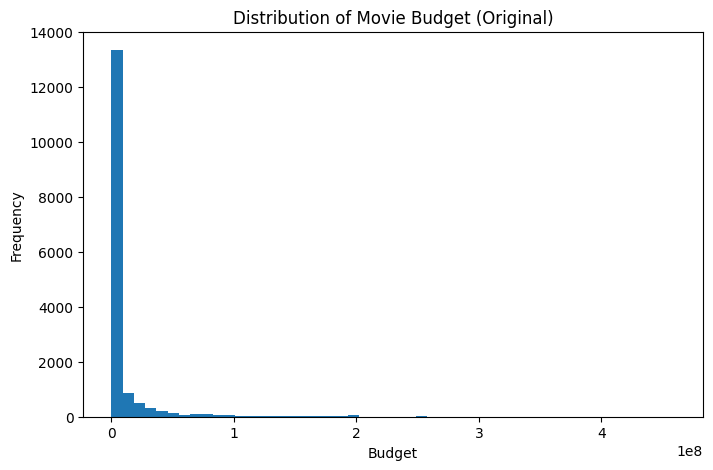

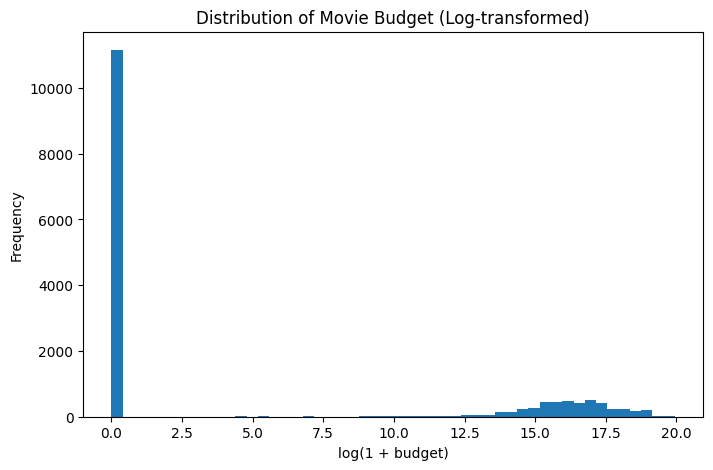

In [14]:
# Histogram for movie budget (original scale)
plt.figure(figsize=(8, 5))
plt.hist(movies_df["budget"], bins=50)
plt.title("Distribution of Movie Budget (Original)")
plt.xlabel("Budget")
plt.ylabel("Frequency")
plt.show()

# Histogram for movie budget (log-transformed)
plt.figure(figsize=(8, 5))
plt.hist(np.log1p(movies_df["budget"]), bins=50)
plt.title("Distribution of Movie Budget (Log-transformed)")
plt.xlabel("log(1 + budget)")
plt.ylabel("Frequency")
plt.show()

Movies – Budget
- Original budget distribution is extremely right-skewed, with most values concentrated near zero.
- A large proportion of movies have budget values equal to zero, likely indicating missing or undisclosed information.
- After log transformation, the distribution of non-zero budgets becomes more spread out, making the underlying structure more interpretable.

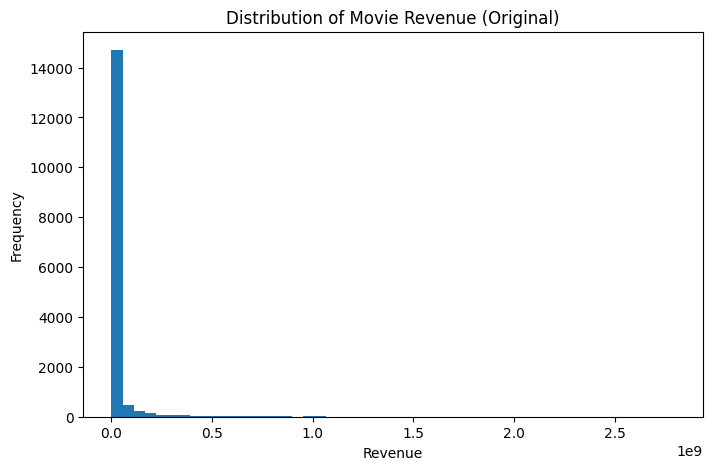

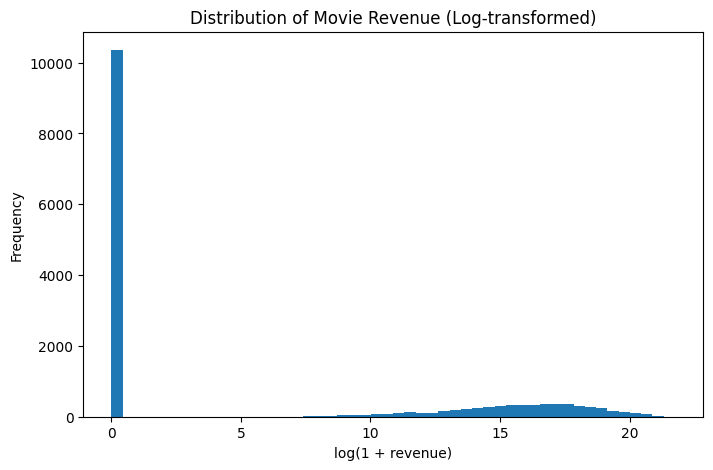

In [20]:
# Plot histogram for movie revenue
plt.figure(figsize=(8, 5))
plt.hist(movies_df["revenue"], bins=50)
plt.title("Distribution of Movie Revenue (Original)")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(np.log1p(movies_df["revenue"]), bins=50)
plt.title("Distribution of Movie Revenue (Log-transformed)")
plt.xlabel("log(1 + revenue)")
plt.ylabel("Frequency")
plt.show()

Movies – Revenue

- The original revenue distribution is extremely right-skewed, with the majority of movies earning very low or zero revenue.
- A small number of movies generate exceptionally high revenues, creating a long right tail.
- This skewness makes it difficult to understand the typical revenue level using the original scale.
- After log transformation, the distribution becomes more spread out and interpretable, revealing the relative differences among non-zero revenue values more clearly.

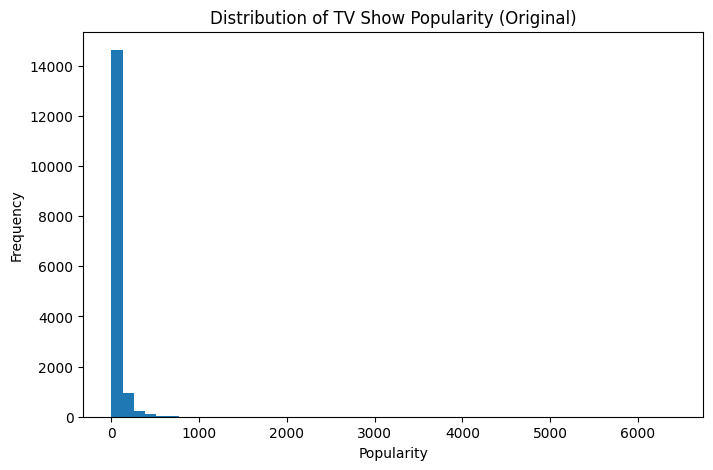

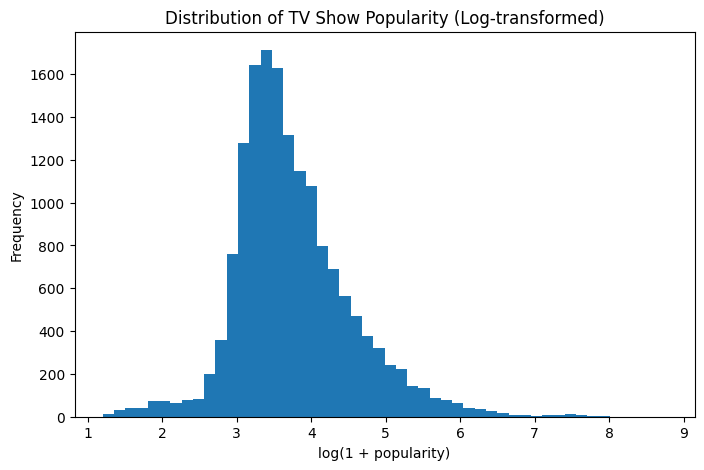

In [19]:
# Plot histogram for TV show popularity
plt.figure(figsize=(8, 5))
plt.hist(tv_df["popularity"], bins=50)
plt.title("Distribution of TV Show Popularity (Original)")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(np.log1p(tv_df["popularity"]), bins=50)
plt.title("Distribution of TV Show Popularity (Log-transformed)")
plt.xlabel("log(1 + popularity)")
plt.ylabel("Frequency")
plt.show()

TV Shows – Popularity

- The original popularity distribution is highly right-skewed, with most TV shows clustered at very low popularity values.
- Only a small fraction of TV shows achieve extremely high popularity, resulting in a long right tail.
- This indicates that popularity is dominated by a few blockbuster titles.
- After log transformation, the distribution appears closer to a bell-shaped form, making the central tendency and spread of typical TV show popularity much easier to observe.

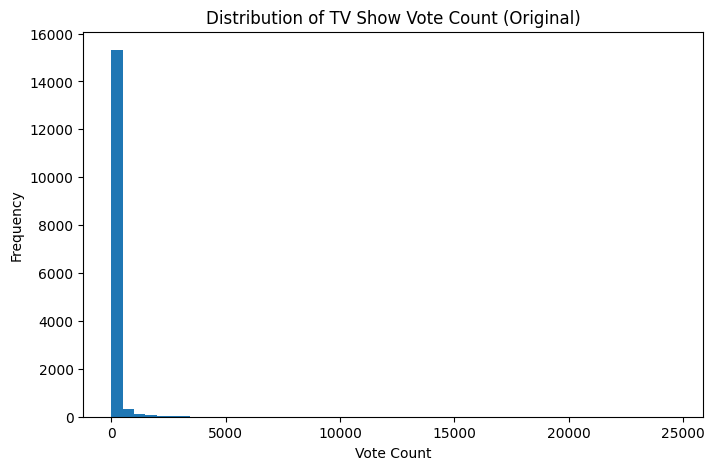

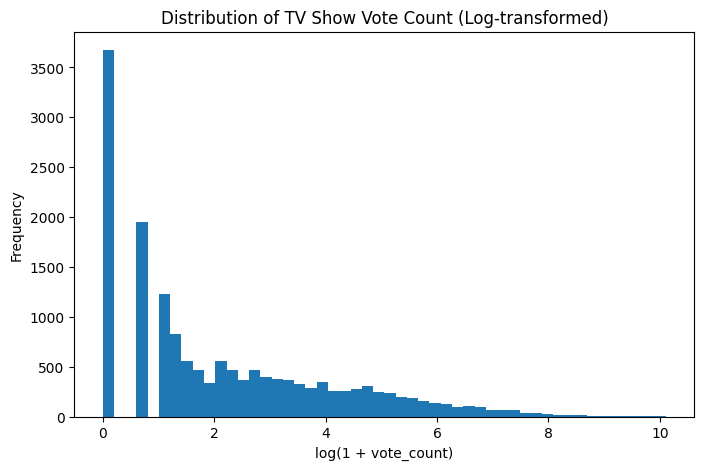

In [21]:
# Plot histogram for TV show vote count
plt.figure(figsize=(8, 5))
plt.hist(tv_df["vote_count"], bins=50)
plt.title("Distribution of TV Show Vote Count (Original)")
plt.xlabel("Vote Count")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(np.log1p(tv_df["vote_count"]), bins=50)
plt.title("Distribution of TV Show Vote Count (Log-transformed)")
plt.xlabel("log(1 + vote_count)")
plt.ylabel("Frequency")
plt.show()

TV Shows – Vote Count

- The original vote count distribution is heavily right-skewed, with most TV shows receiving very few votes.
- A limited number of highly popular shows accumulate a disproportionately large number of votes.
- This imbalance causes extreme values to dominate the original-scale histogram.
- After log transformation, the distribution becomes more balanced, allowing clearer comparison across different levels of audience engagement.

### EDA Summary: Distribution Characteristics
Across both movies and TV shows, all major numerical variables (popularity, budget, revenue, and vote count) exhibit strong right-skewed distributions. In their original scales, the majority of observations are concentrated near zero, while a small number of extreme values create long right tails. This pattern indicates that audience attention, financial investment, and commercial success are dominated by a limited number of blockbuster titles, making the original distributions difficult to interpret in terms of typical behavior.

Applying log transformations significantly improves interpretability by compressing extreme values and spreading out the bulk of the data. After transformation, the central tendencies and overall distributional structures become clearer, enabling more meaningful comparison across titles. These results suggest that log-transformed variables are more appropriate for subsequent analyses, such as correlation, regression, and cross-category comparisons in later stages of the project.